<a href="https://colab.research.google.com/github/MarcoCastelli4/Drug-Consumption/blob/main/Castelli_Citroni_DrugConsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analisi Drug consumption**

# Analisi Drug Consumption dataset

Classificare il tipo di consumatore di droga in base ai dati sulla personalità in base al tipo di droga

Il database contiene record per 1885 intervistati.

Dopo la quantificazione, i valori di tutte le feature di input possono essere considerati come valori reali. Inoltre, i partecipanti sono stati interrogati sul loro uso di 18 droghe legali e illegali (alcol, anfetamine, nitrito di amile, benzodiazepine, cannabis, cioccolato, cocaina, caffeina, crack, ecstasy, eroina, ketamina, droghe legali, LSD, metadone, funghi, abuso di nicotina e sostanze volatili e un farmaco fittizio (Semeron) che è stato introdotto per identificare i pretendenti in eccesso. Per ogni farmaco devono selezionare una delle risposte: non ha mai usato il farmaco, l'ha usato più di dieci anni fa o nell'ultimo decennio, anno, mese, settimana o giorno.

Il database contiene 18 problemi di classificazione. Ognuna delle variabili etichetta indipendenti contiene sette classi: "Mai usata", "Usata oltre un decennio fa", "Usata nell'ultimo decennio", "Usata nell'ultimo anno", "Usata nell'ultimo mese", "Usata nell'ultima settimana", e "Usato nell'ultimo giorno".

L'obiettivo è classificare il consumo di ogni droga in modo binario: "Alta predisposione" o "Bassa predisposizione".



# Descrizione degli attributi




## Input:
1. ID è il numero di record nel database originale. Non può essere correlato al partecipante. Può essere utilizzato solo come riferimento.

2. L'età (reale) è l'età del partecipante e ha uno dei valori

3. Sesso (reale) è il sesso del partecipante

4. Dottorato livello di educazione di ogni partecipante

5. Paese (reale) è il paese di residenza attuale del partecipante e ha uno dei valori

6. Etnia (reale) è l'etnia del partecipante e ha uno dei valori

7. Nscore (Real) è NEO-FFI-R Neuroticism.

8. Escore (Real) è NEO-FFI-R Extraversion.

9. Oscore (Real) è NEO-FFI-R Openness to experience.

10. Ascore (Real) è NEO-FFI-R Piacevolezza.

11. Cscore (Real) è NEO-FFI-R Coscienziosità.

12. Impulsivo (reale) è l'impulsività misurata da BIS-11.

13. SS (reale) è la visione delle sensazioni misurata da ImpSS.


## Output

*Per tutte le droghe i consumi sono rappresentati da questo valore:
 CLO mai usata, CL1 usata 10 anni fa, CL2, usata negli ultimi 10 anni, CL3  usata nell'ultimo anno, CL4 usata nell'ultimo mese, CL5 usata nell'ultima settimana e CL6 usata ieri.*

 ** Abbiamo deciso di classificare in modo binario ragggruppando da CL0 a CL4 e da CL5 a CL6, in modo da formare le classi: dipendenza e non dipendenza **


14. L'alcol è la classe di consumo di alcol.

15. Amphet è la classe di consumo di anfetamine.

16. L'amile è la classe di consumo di nitrito di amile.

17. Benzos è la classe di consumo di benzodiazepine.

18. Caff è la classe di consumo di caffeina.

19. La cannabis è una classe di consumo di cannabis.

20. Choc è la classe di consumo di cioccolato.

21. La coca è una classe di consumo di cocaina.

22. Crack è la classe di consumo di crack.

23. L'ecstasy è una classe di consumo di ecstasy.

24. L'eroina è una classe di consumo di eroina.

25. La ketamina è una classe di consumo di ketamina.

26. Legalh è una classe di consumo di sostanze stupefacenti legali.

27. LSD è la classe di consumo di alcol.

28. Meth è la classe di consumo di metadone.

29. I funghi sono una classe di consumo di funghi magici.

30. La nicotina è una classe di consumo di nicotina.

31. Semer è una classe di consumo fittizio di droga Semeron.

32. VSA è la classe di consumo di abuso di sostanze volatili.

In [28]:
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

!pip uninstall scikit-learn -y
!pip install -U scikit-learn
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=bac6b932322f1e1c02207852ec2eb9ce62ba0a762f7b64471c902c70a826ba6d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: word

     / 22.6 MB 19.5 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=353033 sha256=e73748d53545e88fd4facf1d235147c851881dfcc7a1f78b6d9f00ab29035f69
  Stored in directory: /tmp/pip-ephem-wheel-cache-jh342jhr/wheels/f5/4e/04/09011c49d76834ce963a4fe57acc90b11fa8bb282bb9781d97
Successfully built ydata-profiling
  Attempting uninstall: ydata-profiling
    Found existing installation: ydata-profiling 4.3.1
    Uninstalling ydata-profiling-4.3.1:
      Successfully uninstalled ydata-profiling-4.3.1


In [29]:
import sys
import pandas as pd
from typing import List


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.experimental import enable_iterative_imputer
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeClassifier

import requests
import ydata_profiling as pp
from pandas_profiling.utils.cache import cache_file
from google.colab import drive

drive.mount('/content/drive')

pathDrive="drive/MyDrive/drug_consumption/drug_consumption.csv";

dataset = pd.read_csv(pathDrive, sep=',', names=["ID", "Età", "Genere", "Istruzione", "Paese", "Etnia","Nscore","Escore","Oscore","Ascore","Cscore","Impulsività","SS","Alcool","Anfetamina","Emyl","Benzos","Caffeina","Cannabis","Cioccolata","Cocaina","Crack","Ecstasy","Eroina","Ketamina","Droge legali","LSD","Metadone","Funghi","Nicotina","Semer","VSA"])
# Save the target column and drop the target
droghe=["Alcool","Anfetamina","Emyl","Benzos","Caffeina","Cannabis","Cioccolata","Cocaina","Crack","Ecstasy","Eroina","Ketamina","Droge legali","LSD","Metadone","Funghi","Nicotina","Semer","VSA"];
target = dataset[droghe]
#dataset.drop(droghe,axis=1, inplace=True)


# Convertiamo il problema di classificazione multiclasse in un problema binario
for d in droghe:
  target[d] = (target[d]=='CL6') | (target[d]=='CL5');

dataset[droghe]=target
dataset




<ipython-input-29-0ca8d64ea3f7>:24: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling.utils.cache import cache_file


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-29-0ca8d64ea3f7>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target[d] = (target[d]=='CL6') | (target[d]=='CL5');


ID      Età   Genere  Istruzione    Paese    Etnia   Nscore   Escore  \
0        1  0.49788  0.48246    -0.05921  0.96082  0.12600  0.31287 -0.57545   
1        2 -0.07854 -0.48246     1.98437  0.96082 -0.31685 -0.67825  1.93886   
2        3  0.49788 -0.48246    -0.05921  0.96082 -0.31685 -0.46725  0.80523   
3        4 -0.95197  0.48246     1.16365  0.96082 -0.31685 -0.14882 -0.80615   
4        5  0.49788  0.48246     1.98437  0.96082 -0.31685  0.73545 -1.63340   
...    ...      ...      ...         ...      ...      ...      ...      ...   
1880  1884 -0.95197  0.48246    -0.61113 -0.57009 -0.31685 -1.19430  1.74091   
1881  1885 -0.95197 -0.48246    -0.61113 -0.57009 -0.31685 -0.24649  1.74091   
1882  1886 -0.07854  0.48246     0.45468 -0.57009 -0.31685  1.13281 -1.37639   
1883  1887 -0.95197  0.48246    -0.61113 -0.57009 -0.31685  0.91093 -1.92173   
1884  1888 -0.95197 -0.48246    -0.61113  0.21128 -0.31685 -0.46725  2.12700   

       Oscore   Ascore  ...  Ecstasy  Eroina  Ketamina  Droge legali    LSD  \
0    -0.58331 -0.91699  ...    False   False     False         False  False   
1     1.43533  0.76096  ...    False   False     False         False  False   
2    -0.84732 -1.62090  ...    False   False     False         False  False   
3    -0.01928  0.59042  ...    False   False     False         False  False   
4    -0.45174 -0.30172  ...    False   False     False         False  False   
...       ...      ...  ...      ...     ...       ...           ...    ...   
1880  1.88511  0.76096  ...    False   False     False         False  False   
1881  0.58331  0.76096  ...    False   False     False         False   True   
1882 -1.27553 -1.77200  ...    False   False     False         False  False   
1883  0.29338 -1.62090  ...    False   False     False         False  False   
1884  1.65653  1.11406  ...    False   False     False         False  False   

      Metadone  Funghi  Nicotina  Semer    VSA  
0        False   False     False  False  False  
1        False   False     False  False  False  
2        False   False     False  False  False  
3        False   False     False  False  False  
4        False   False     False  False  False  
...        ...     ...       ...    ...    ...  
1880     False   False     False  False   True  
1881     False   False      True  False  False  
1882     False   False      True  False  False  
1883     False   False     False  False  False  
1884     False   False      True  False  False  

[1885 rows x 32 columns]

# Data Analysis



Vado a eliminare la colonna relativa all'*ID*

In [32]:
dataset.drop("ID",axis=1, inplace=True)

KeyError: ignored

Inoltre riteniamo non necessario fare un **aggregation** dei dati in quanto le feature sono ben distinte tra loro

Viene analizzato il dataset utilizzando il profile report messo a disposizione da Pandas

In [31]:
pp.ProfileReport(dataset)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Il dataset analizzato presenta diverse classificazioni in base alla sostanza analizzata.

In particolare per quanto riguarda la dipendeza (almeno una volta a settimana)
-  Alcol circa il 68% delle persone
- Caffeina ovviamente molto alta 88%
- Cannabis 34%
- Cioccolata 80%
- Nicotina 40%
- Semer 0%

Per quanto riguarda le altre droghe i valori sono ampiamneti sbilanciati verso una classificazione negativa (NON dipendenza)


Abbiamo una certa collerazione tra SS e Impulsività 0.629.



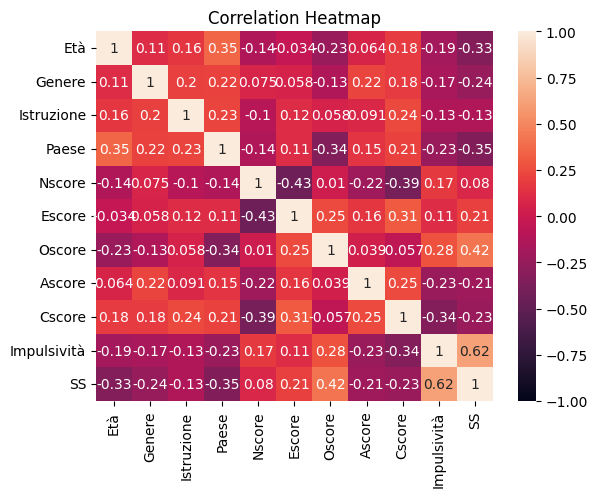

In [38]:
dataset.drop(droghe,axis=1, inplace=True)
heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap')
plt.show()



Inoltre, abbiamo notato che anche l’attributo Etnia non fornisce delle informazioni in più poiché il 92% dei pazienti appartiene alla medesima. Quindi lo abbiamo eliminato

In [39]:
dataset.drop("Etnia",axis=1, inplace=True)

KeyError: ignored

##**Verifico i missing values e li vado a sostituire con il valore medio**

In [103]:
def count_missing(ds: pd.DataFrame):
    return ds.shape[0] - ds.count()

def array_to_dataframe(arr: np.ndarray, columns: List[str]):
    return pd.DataFrame(data=arr, columns=columns)

count_missing(dataset)

median_imp_arr = SimpleImputer(strategy="median").fit_transform(dataset)
dataset = array_to_dataframe(arr=median_imp_arr, columns=dataset.columns)
dataset

count_missing(dataset)


Età   Genere  Istruzione    Paese   Nscore   Escore   Oscore  \
0     0.49788  0.48246    -0.05921  0.96082  0.31287 -0.57545 -0.58331   
1    -0.07854 -0.48246     1.98437  0.96082 -0.67825  1.93886  1.43533   
2     0.49788 -0.48246    -0.05921  0.96082 -0.46725  0.80523 -0.84732   
3    -0.95197  0.48246     1.16365  0.96082 -0.14882 -0.80615 -0.01928   
4     0.49788  0.48246     1.98437  0.96082  0.73545 -1.63340 -0.45174   
...       ...      ...         ...      ...      ...      ...      ...   
1880 -0.95197  0.48246    -0.61113 -0.57009 -1.19430  1.74091  1.88511   
1881 -0.95197 -0.48246    -0.61113 -0.57009 -0.24649  1.74091  0.58331   
1882 -0.07854  0.48246     0.45468 -0.57009  1.13281 -1.37639 -1.27553   
1883 -0.95197  0.48246    -0.61113 -0.57009  0.91093 -1.92173  0.29338   
1884 -0.95197 -0.48246    -0.61113  0.21128 -0.46725  2.12700  1.65653   

       Ascore   Cscore  Impulsività       SS  
0    -0.91699 -0.00665     -0.21712 -1.18084  
1     0.76096 -0.14277     -0.71126 -0.21575  
2    -1.62090 -1.01450     -1.37983  0.40148  
3     0.59042  0.58489     -1.37983 -1.18084  
4    -0.30172  1.30612     -0.21712 -0.21575  
...       ...      ...          ...      ...  
1880  0.76096 -1.13788      0.88113  1.92173  
1881  0.76096 -1.51840      0.88113  0.76540  
1882 -1.77200 -1.38502      0.52975 -0.52593  
1883 -1.62090 -2.57309      1.29221  1.22470  
1884  1.11406  0.41594      0.88113  1.22470  

[1885 rows x 11 columns]

##**Cerco di trovare gli outlier**

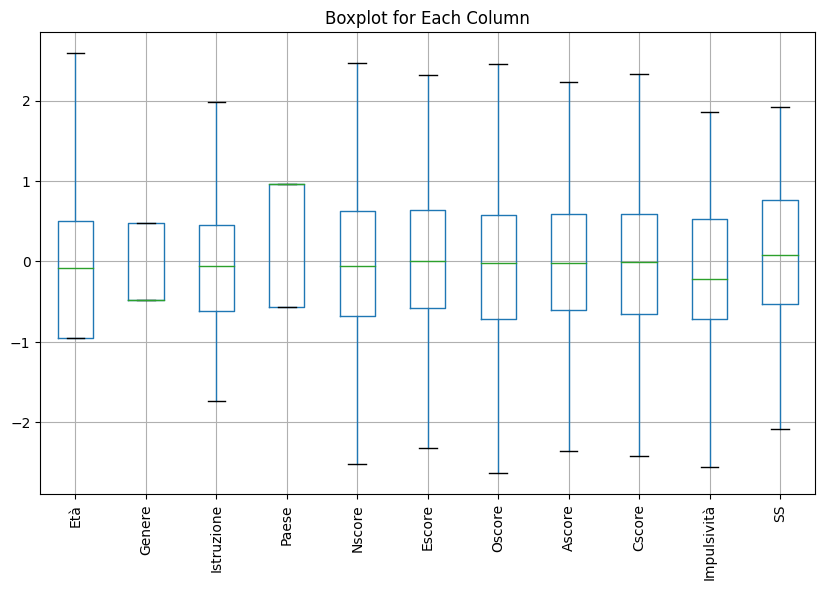

In [111]:
dataset.boxplot(figsize=(10, 6))
plt.xticks(rotation=90)
plt.title("Boxplot for Each Column")
plt.show()

Elimino gli outlier cioè quelli che stanno fuori dal boxplot

In [110]:
names=["Età", "Genere", "Istruzione", "Paese","Nscore","Escore","Oscore","Ascore","Cscore","Impulsività","SS"];
for x in names:
  q75,q25=np.percentile(dataset.loc[:,x],[75,25])
  intr_qr=q75-q25
  max=q75+(1.5*intr_qr)
  min=q25-(1.5*intr_qr)

  dataset.loc[dataset[x]<min,x]=np.nan
  dataset.loc[dataset[x]>max,x]=np.nan
  dataset[names].isnull().sum()
  dataset=dataset.dropna(axis=0)


dataset

Età   Genere  Istruzione    Paese   Nscore   Escore   Oscore  \
0     0.49788  0.48246    -0.05921  0.96082  0.31287 -0.57545 -0.58331   
1    -0.07854 -0.48246     1.98437  0.96082 -0.67825  1.93886  1.43533   
2     0.49788 -0.48246    -0.05921  0.96082 -0.46725  0.80523 -0.84732   
3    -0.95197  0.48246     1.16365  0.96082 -0.14882 -0.80615 -0.01928   
4     0.49788  0.48246     1.98437  0.96082  0.73545 -1.63340 -0.45174   
...       ...      ...         ...      ...      ...      ...      ...   
1879 -0.95197 -0.48246    -0.61113 -0.28519 -0.79151  0.32197  0.29338   
1880 -0.95197  0.48246    -0.61113 -0.57009 -1.19430  1.74091  1.88511   
1881 -0.95197 -0.48246    -0.61113 -0.57009 -0.24649  1.74091  0.58331   
1882 -0.07854  0.48246     0.45468 -0.57009  1.13281 -1.37639 -1.27553   
1884 -0.95197 -0.48246    -0.61113  0.21128 -0.46725  2.12700  1.65653   

       Ascore   Cscore  Impulsività       SS  
0    -0.91699 -0.00665     -0.21712 -1.18084  
1     0.76096 -0.14277     -0.71126 -0.21575  
2    -1.62090 -1.01450     -1.37983  0.40148  
3     0.59042  0.58489     -1.37983 -1.18084  
4    -0.30172  1.30612     -0.21712 -0.21575  
...       ...      ...          ...      ...  
1879 -0.30172 -0.27607      0.88113  0.76540  
1880  0.76096 -1.13788      0.88113  1.92173  
1881  0.76096 -1.51840      0.88113  0.76540  
1882 -1.77200 -1.38502      0.52975 -0.52593  
1884  1.11406  0.41594      0.88113  1.22470  

[1770 rows x 11 columns]